In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [2]:
#df = pd.read_csv("/mnt/d/NRCan/2022_MicrobiomeQuebecMexico/DATA/ITS/Full/Peuplier_REPRISE_ITS_oct2022.ASV_table_rarefied_11982_dnNA.guilds.txt", sep='\t', header=0)
df = pd.read_csv("/mnt/d/NRCan/2022_MicrobiomeQuebecMexico/DATA/Aspen_18S_may2024/all/Aspen_18S_may2024.ASV_table_norarefaction_dnNA.guilds.txt", sep='\t', header=0)


#df = df.set_index('#OTU ID')
df.head()

,#OTU ID,18S-AMF-003-ESSI-001-S-Sol,18S-AMF-006-ESSI-002-S-Sol,18S-AMF-009-ESSI-003-S-Sol,18S-AMF-012-ESSI-004-S-Sol,18S-AMF-015-ESSI-005-S-Sol,18S-AMF-018-AMOS-001-S-Sol,18S-AMF-021-AMOS-002-S-Sol,18S-AMF-024-AMOS-003-S-Sol,18S-AMF-027-AMOS-004-S-Sol,...,taxonomy,Taxon,Taxon Level,Trophic Mode,Guild,Growth Morphology,Trait,Confidence Ranking,Notes,Citation/Source
0,e102dfca990019e8a685d9246d973f5c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,-,-,-,-,-,-,-,Unassigned,-
1,21a1073c8577cdb48359ef9de1de72c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,d__Eukaryota; p__Chlorophyta; c__Trebouxiophyc...,-,-,-,-,-,-,-,Unassigned,-
2,56d8392aa4bbd6790a25d976c1cff323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,d__Eukaryota; p__Chlorophyta; c__Trebouxiophyc...,-,-,-,-,-,-,-,Unassigned,-
3,4704cff46528d375a3544d95f88edd66,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,d__Eukaryota; p__Cryptomycota; c__Cryptomycota...,-,-,-,-,-,-,-,Unassigned,-
4,6b4b4e3b1ebfe3600e0e7c254dbd5b62,4914.0,2411.0,0.0,302.0,5154.0,5658.0,546.0,2692.0,1718.0,...,d__Eukaryota; p__Mucoromycota; c__Glomeromycet...,Glomeraceae,9,Symbiotroph,Arbuscular Mycorrhizal,Microfungus,NaN,Highly Probable,NaN,"b'Redecker D, et al. 2013. Mycorrhiza 23:515-5..."


## Abundance and taxonomy tables 

In [4]:
df.columns.values

array(['#OTU ID', '18S-AMF-003-ESSI-001-S-Sol',
       '18S-AMF-006-ESSI-002-S-Sol', '18S-AMF-009-ESSI-003-S-Sol',
       '18S-AMF-012-ESSI-004-S-Sol', '18S-AMF-015-ESSI-005-S-Sol',
       '18S-AMF-018-AMOS-001-S-Sol', '18S-AMF-021-AMOS-002-S-Sol',
       '18S-AMF-024-AMOS-003-S-Sol', '18S-AMF-027-AMOS-004-S-Sol',
       '18S-AMF-030-AMOS-005-S-Sol', '18S-AMF-033-STFE-006-S-Sol',
       '18S-AMF-036-STFE-007-S-Sol', '18S-AMF-039-STFE-008-S-Sol',
       '18S-AMF-042-STFE-009-S-Sol', '18S-AMF-045-STFE-010-S-Sol',
       '18S-AMF-048-FORE-001S-Sol', '18S-AMF-051-FORE-002S-Sol',
       '18S-AMF-054-FORE-003S-Sol', '18S-AMF-057-FORE-004S-Sol',
       '18S-AMF-060-FORE-005S-Sol', '18S-AMF-063-FORE-006S-Sol',
       '18S-AMF-066-STET-001-Sol', '18S-AMF-069-STET-002-Sol',
       '18S-AMF-072-STET-006-Sol', '18S-AMF-075-STET-007-Sol',
       '18S-AMF-078-STET-008-Sol', '18S-AMF-081-FP2-1-3-Sol',
       '18S-AMF-084-FP2-5-3-Sol', '18S-AMF-087-FP2-7-3-Sol',
       '18S-AMF-090-FP2-8-3-Sol', '18S-

In [5]:
ctrl = ['18S-AMF-139-control','18S-AMF-Ctrl-neg-ext-sol','18S-AMF-Ctrl-neg-extrhizo']
columns_samples = [ele for ele in df.columns if '18S-AMF' in ele and ele not in ctrl]
columns_tax = [ele for ele in df.columns if '18S-AMF' not in ele]
df_abu = df[columns_samples]
df_abu = df_abu.set_index(df['#OTU ID'])
df_tax = df[columns_tax]
df_tax = df_tax.set_index('#OTU ID')
print(df_tax.shape)
df_tax.head()

(1231, 10)


,taxonomy,Taxon,Taxon Level,Trophic Mode,Guild,Growth Morphology,Trait,Confidence Ranking,Notes,Citation/Source
#OTU ID,,,,,,,,,,
e102dfca990019e8a685d9246d973f5c,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,-,-,-,-,-,-,-,Unassigned,-
21a1073c8577cdb48359ef9de1de72c2,d__Eukaryota; p__Chlorophyta; c__Trebouxiophyc...,-,-,-,-,-,-,-,Unassigned,-
56d8392aa4bbd6790a25d976c1cff323,d__Eukaryota; p__Chlorophyta; c__Trebouxiophyc...,-,-,-,-,-,-,-,Unassigned,-
4704cff46528d375a3544d95f88edd66,d__Eukaryota; p__Cryptomycota; c__Cryptomycota...,-,-,-,-,-,-,-,Unassigned,-
6b4b4e3b1ebfe3600e0e7c254dbd5b62,d__Eukaryota; p__Mucoromycota; c__Glomeromycet...,Glomeraceae,9,Symbiotroph,Arbuscular Mycorrhizal,Microfungus,NaN,Highly Probable,NaN,"b'Redecker D, et al. 2013. Mycorrhiza 23:515-5..."


In [6]:
df_tax['group'] = df_tax['Guild'].fillna('Other')
df_tax['group'] = df_tax['group'].apply(lambda x: x if x != "-" else "Other")
df_tax['group'] = df_tax.apply(lambda x: x['group'] if x['Confidence Ranking'] in ["Probable","Highly Probable"] else "Other", axis=1)
df_tax['group'] = df_tax['group'].apply(lambda x: 'Mixed' if '-' in str(x) else str(x))
df_tax.head()

df_guilds = df_tax[['group']]
df_guilds

,group
#OTU ID,
e102dfca990019e8a685d9246d973f5c,Other
21a1073c8577cdb48359ef9de1de72c2,Other
56d8392aa4bbd6790a25d976c1cff323,Other
4704cff46528d375a3544d95f88edd66,Other
6b4b4e3b1ebfe3600e0e7c254dbd5b62,Arbuscular Mycorrhizal
...,...
d16e6fb4cc658acc5fb7e45f04f36145,Arbuscular Mycorrhizal
abb674bba85d95741a36e438330a70a2,Other
90ca118c8ca9ee60d714694eff17ed8d,Other


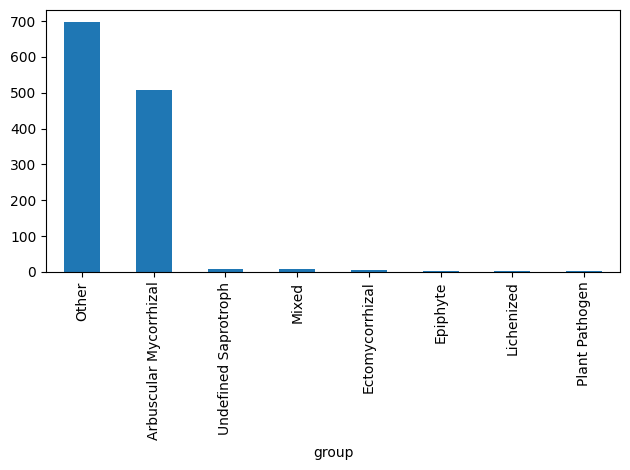

In [7]:
df_guilds['group'].value_counts().plot.bar()
plt.tight_layout()
#plt.savefig('guilds_01_abundance_guilds.png', dpi=150)

## Metadata

In [9]:
df_meta = pd.read_excel("/mnt/d/NRCan/2022_MicrobiomeQuebecMexico/DATA/Aspen_18S_may2024/metadata_18S.xlsx")
#df_meta['name'] = df_meta['long.name(sequencing_R)'].apply(lambda x: x.replace('.','-').replace('X',''))
df_meta.head(3)

,sampleid,s_name,short_code,short_name,site,source,cluster,marker,location
0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
1,18S-AMF-006-ESSI-002-S-Sol,ESSI-002 S,ESSI.002.S,ESSI.002.S,ESSI,Soil,NENA,18S,natural_stands
2,18S-AMF-009-ESSI-003-S-Sol,ESSI-003 S,ESSI.003.S,ESSI.003.S,ESSI,Soil,NENA,18S,natural_stands


# Sum abundances across guilds

In [13]:
print(df_guilds.shape)
print(df_abu.shape)
df_abu.head()

(1231, 1)
(1231, 82)


,18S-AMF-003-ESSI-001-S-Sol,18S-AMF-006-ESSI-002-S-Sol,18S-AMF-009-ESSI-003-S-Sol,18S-AMF-012-ESSI-004-S-Sol,18S-AMF-015-ESSI-005-S-Sol,18S-AMF-018-AMOS-001-S-Sol,18S-AMF-021-AMOS-002-S-Sol,18S-AMF-024-AMOS-003-S-Sol,18S-AMF-027-AMOS-004-S-Sol,18S-AMF-030-AMOS-005-S-Sol,...,18S-AMF-sol-AB12,18S-AMF-sol-FORE-001,18S-AMF-sol-FORE-004,18S-AMF-sol-FORE-007,18S-AMF-sol-FP2-3-5,18S-AMF-sol-FP2-5-11,18S-AMF-sol-FP2-5-17,18S-AMF-sol-SP-4,18S-AMF-sol-SP-45,18S-AMF-sol-SP-56
#OTU ID,,,,,,,,,,,,,,,,,,,,,
e102dfca990019e8a685d9246d973f5c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3448.0,3110.0,3924.0,1744.0,268.0,2277.0,3469.0,405.0,1670.0,3092.0
21a1073c8577cdb48359ef9de1de72c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,710.0,12139.0,1062.0,18100.0,28677.0,3430.0,8129.0,1226.0,7942.0,4334.0
56d8392aa4bbd6790a25d976c1cff323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23722.0,304.0,27736.0,141.0,43.0,28.0,1030.0,14.0,7.0,2590.0
4704cff46528d375a3544d95f88edd66,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,5055.0,0.0,0.0,6784.0,0.0,22738.0,12222.0,44.0,470.0,23582.0
6b4b4e3b1ebfe3600e0e7c254dbd5b62,4914.0,2411.0,0.0,302.0,5154.0,5658.0,546.0,2692.0,1718.0,1165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_sum = df_abu.groupby(df_guilds['group']).sum()
df_sum.to_csv("guilds_01_read_stands.csv", sep=",", header=True, index=True)

df_sum.head()

,18S-AMF-003-ESSI-001-S-Sol,18S-AMF-006-ESSI-002-S-Sol,18S-AMF-009-ESSI-003-S-Sol,18S-AMF-012-ESSI-004-S-Sol,18S-AMF-015-ESSI-005-S-Sol,18S-AMF-018-AMOS-001-S-Sol,18S-AMF-021-AMOS-002-S-Sol,18S-AMF-024-AMOS-003-S-Sol,18S-AMF-027-AMOS-004-S-Sol,18S-AMF-030-AMOS-005-S-Sol,...,18S-AMF-sol-AB12,18S-AMF-sol-FORE-001,18S-AMF-sol-FORE-004,18S-AMF-sol-FORE-007,18S-AMF-sol-FP2-3-5,18S-AMF-sol-FP2-5-11,18S-AMF-sol-FP2-5-17,18S-AMF-sol-SP-4,18S-AMF-sol-SP-45,18S-AMF-sol-SP-56
group,,,,,,,,,,,,,,,,,,,,,
Arbuscular Mycorrhizal,27047.0,21417.0,16430.0,19423.0,38067.0,24586.0,24221.0,26142.0,30497.0,27415.0,...,0.0,30.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
Ectomycorrhizal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,70.0,360.0,34.0,0.0,0.0,0.0,0.0,0.0,47.0
Epiphyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,14.0,11.0,0.0,35.0
Lichenized,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,0.0,7.0,76.0,69.0,0.0,0.0,0.0,0.0,0.0
Mixed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,12.0,4.0,0.0,0.0,93.0,0.0,22.0


In [15]:
dt_sum = df_sum.T
stack_guilds = dt_sum.stack().reset_index().rename(columns={'level_0' : 'sample', 0 : 'count'})
df_meta_summed = pd.merge(stack_guilds, df_meta, left_on = 'sample', right_on = 'sampleid', how='left')
df_meta_summed

,sample,group,count,sampleid,s_name,short_code,short_name,site,source,cluster,marker,location
0,18S-AMF-003-ESSI-001-S-Sol,Arbuscular Mycorrhizal,27047.0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
1,18S-AMF-003-ESSI-001-S-Sol,Ectomycorrhizal,0.0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
2,18S-AMF-003-ESSI-001-S-Sol,Epiphyte,0.0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
3,18S-AMF-003-ESSI-001-S-Sol,Lichenized,0.0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
4,18S-AMF-003-ESSI-001-S-Sol,Mixed,0.0,18S-AMF-003-ESSI-001-S-Sol,ESSI-001 S,ESSI.001.S,ESSI.001.S,ESSI,Soil,NENA,18S,natural_stands
...,...,...,...,...,...,...,...,...,...,...,...,...
651,18S-AMF-sol-SP-56,Lichenized,0.0,18S-AMF-sol-SP-56,SP-56,SP-56,SP-56,SP,Soil,MX,18S,greenhouse
652,18S-AMF-sol-SP-56,Mixed,22.0,18S-AMF-sol-SP-56,SP-56,SP-56,SP-56,SP,Soil,MX,18S,greenhouse
653,18S-AMF-sol-SP-56,Other,45258.0,18S-AMF-sol-SP-56,SP-56,SP-56,SP-56,SP,Soil,MX,18S,greenhouse
654,18S-AMF-sol-SP-56,Plant Pathogen,0.0,18S-AMF-sol-SP-56,SP-56,SP-56,SP-56,SP,Soil,MX,18S,greenhouse


In [16]:
df_meta_summed.to_csv("guilds_01_read_stands_meta.csv", sep=",", header=True, index=False)